<a href="https://colab.research.google.com/github/fiyero/Colab_learning/blob/master/%E3%80%8CFun_with_tf_data_Dataset_(solution)_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import os, sys, math
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.3.0


In [ ]:
#@title "display utilities [RUN ME]"
def display_9_images_from_dataset(dataset):
  plt.figure(figsize=(13,13))
  subplot=331
  for i, (image, label) in enumerate(dataset):
    plt.subplot(subplot)
    plt.axis('off')
    plt.imshow(image.numpy().astype(np.uint8))
    plt.title(label.numpy().decode("utf-8"), fontsize=16)
    subplot += 1
    if i==8:
      break
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()

## Configuration

In [ ]:
GCS_PATTERN = 'gs://flowers-public/*/*.jpg'
CLASSES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'] 
# flower labels (folder names in the data)

In [ ]:
nb_images = len(tf.io.gfile.glob(GCS_PATTERN))
nb_images
#tf.io.gfile.glob(pattern)
#Returns a list of files that match the given pattern(s).

#'*': matches any sequence of non-'/' characters
#'?': matches a single non-'/' character
#'[' [ '^' ] { match-list } ']': matches any single character (not) on the list
#c: matches character c where c != '*', '?', '\\', '['
#'\\' c: matches character c
#character range:

#c: matches character c while c != '\\', '-', ']'
#'\\' c: matches character c
#lo '-' hi: matches character c for lo <= c <= hi

#tf.io.gfile.glob("*.py")
# For example, ['__init__.py']

#tf.io.gfile.glob("__init__.??")
# As above

3670

In [ ]:
print(f"Pattern matches {nb_images} images.")

Pattern matches 3670 images.


## Read images and labels [WORK WAS REQUIRED HERE]
1. Use `fileset=`[`tf.data.Dataset.list_files`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#list_files) to scan the data folder
1. Iterate through the dataset of filenames: `for filename in fileset:...` . 
 * Does it work ? Yes, but if you print the filename you get Tensors containing strings.
 * To display the string only, you can use filename.numpy(). This works on any Tensorflow tensor.
 * tip: to limit the size of the dataset for display, you can use [`Dataset.take()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take). Like this: `for data in dataset.take(10): ....`
1. Use [`tf.data.Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to decode the JPEG files. You will find useful TF code snippets below.
 * Iterate on the image dataset. You can use .numpy().shape to only see the data sizes.
  * Are all images of the same size ?
1. Now create a training dataset: you have images but you also need labels:
 *  the labels (flower names) are the directory names. You will find useful TF code snippets below for parsing them.
 * If you do "`return image, label`" in the decoding function, you will have a Dataset of pairs (image, label).
1. You can see the flowers and their labels with the `display_9_images_from_dataset` function. It expects the Dataset to have `(image, label)` elements.

In [ ]:
filenames_dataset = tf.data.Dataset.list_files(GCS_PATTERN)
for filename in filenames_dataset.take(10): #limit the size of the dataset for display
  print(filename)
  #Tensors containing strings

tf.Tensor(b'gs://flowers-public/dandelion/5628515159_6b437ff1e5_n.jpg', shape=(), dtype=string)
tf.Tensor(b'gs://flowers-public/roses/9320934277_4fb95aef5d_n.jpg', shape=(), dtype=string)
tf.Tensor(b'gs://flowers-public/dandelion/15139657325_74031c44fc.jpg', shape=(), dtype=string)
tf.Tensor(b'gs://flowers-public/dandelion/9301891790_971dcfb35d_m.jpg', shape=(), dtype=string)
tf.Tensor(b'gs://flowers-public/sunflowers/15123604714_dd034a4a3b_n.jpg', shape=(), dtype=string)
tf.Tensor(b'gs://flowers-public/dandelion/20456824132_b1c8fbfa41_m.jpg', shape=(), dtype=string)
tf.Tensor(b'gs://flowers-public/roses/14494590921_3bb1dc7b88_n.jpg', shape=(), dtype=string)
tf.Tensor(b'gs://flowers-public/tulips/16732302779_8aa56f255d_n.jpg', shape=(), dtype=string)
tf.Tensor(b'gs://flowers-public/dandelion/19526570282_1d1e71b0f3_m.jpg', shape=(), dtype=string)
tf.Tensor(b'gs://flowers-public/sunflowers/15030133005_9728102622_z.jpg', shape=(), dtype=string)


In [ ]:
filenames_dataset = tf.data.Dataset.list_files(GCS_PATTERN)
#dataset = tf.data.Dataset.list_files("/path/*.txt")
#https://www.tensorflow.org/api_docs/python/tf/data/Dataset
for filename in filenames_dataset.take(10):
  print(filename.numpy().decode('utf-8'))
  #only want the tensor file path

gs://flowers-public/sunflowers/20258015499_93b9951800_m.jpg
gs://flowers-public/daisy/14591326135_930703dbed_m.jpg
gs://flowers-public/daisy/18442919723_d1251d3e14_n.jpg
gs://flowers-public/sunflowers/4932735362_6e1017140f.jpg
gs://flowers-public/roses/17165596357_392a12391f.jpg
gs://flowers-public/sunflowers/15122871130_6a7d0b4372_n.jpg
gs://flowers-public/tulips/100930342_92e8746431_n.jpg
gs://flowers-public/dandelion/14335561523_f847f2f4f1.jpg
gs://flowers-public/daisy/102841525_bd6628ae3c.jpg
gs://flowers-public/tulips/6931748252_68f06086b3.jpg


In [ ]:
# decode the JPEG files.
#Iterate on the image dataset. You can use .numpy().shape to only see the data sizes.
#Are all images of the same size ?

def decode_jpeg(filename):
  bits = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  #Decode a JPEG-encoded image to a uint8 tensor.
  #https://www.tensorflow.org/api_docs/python/tf/io/decode_jpeg

  return image


image_dataset = filenames_dataset.map(decode_jpeg)
#map(map_func) Maps map_func across the elements of this dataset
#This transformation applies map_func to each element of this dataset,returns a new dataset 
#containing the transformed elements in the same order as input

#use the map func to read the img path and read it into tensor
for image in image_dataset.take(10):
  print(image.numpy().shape)
  

(213, 320, 3)
(333, 500, 3)
(238, 320, 3)
(331, 500, 3)
(240, 180, 3)
(240, 240, 3)
(240, 320, 3)
(334, 500, 3)
(224, 240, 3)
(213, 320, 3)


In [ ]:
image

<tf.Tensor: shape=(213, 320, 3), dtype=uint8, numpy=
array([[[ 52,  25,   0],
        [ 52,  25,   0],
        [ 54,  27,   0],
        ...,
        [195, 116,   0],
        [208, 141,   0],
        [215, 151,   1]],

       [[ 55,  25,   0],
        [ 53,  23,   0],
        [ 53,  23,   0],
        ...,
        [191, 110,   0],
        [219, 150,   0],
        [227, 163,   5]],

       [[ 57,  25,   0],
        [ 54,  22,   0],
        [ 52,  20,   0],
        ...,
        [193, 108,   0],
        [227, 156,   2],
        [231, 169,   0]],

       ...,

       [[ 43,  47,  30],
        [ 42,  46,  29],
        [ 41,  49,  28],
        ...,
        [130, 102,  28],
        [156, 120,  36],
        [182, 139,  35]],

       [[ 42,  46,  29],
        [ 42,  46,  29],
        [ 42,  50,  29],
        ...,
        [109,  88,  31],
        [128, 103,  39],
        [151, 118,  39]],

       [[ 44,  48,  31],
        [ 43,  47,  30],
        [ 43,  51,  30],
        ...,
        [122, 109,  5

In [ ]:
image.numpy()

array([[[ 52,  25,   0],
        [ 52,  25,   0],
        [ 54,  27,   0],
        ...,
        [195, 116,   0],
        [208, 141,   0],
        [215, 151,   1]],

       [[ 55,  25,   0],
        [ 53,  23,   0],
        [ 53,  23,   0],
        ...,
        [191, 110,   0],
        [219, 150,   0],
        [227, 163,   5]],

       [[ 57,  25,   0],
        [ 54,  22,   0],
        [ 52,  20,   0],
        ...,
        [193, 108,   0],
        [227, 156,   2],
        [231, 169,   0]],

       ...,

       [[ 43,  47,  30],
        [ 42,  46,  29],
        [ 41,  49,  28],
        ...,
        [130, 102,  28],
        [156, 120,  36],
        [182, 139,  35]],

       [[ 42,  46,  29],
        [ 42,  46,  29],
        [ 42,  50,  29],
        ...,
        [109,  88,  31],
        [128, 103,  39],
        [151, 118,  39]],

       [[ 44,  48,  31],
        [ 43,  47,  30],
        [ 43,  51,  30],
        ...,
        [122, 109,  56],
        [150, 134,  75],
        [170, 148,  73]]

In [ ]:
#create labels for dataset
#the labels (flower names) are the directory names. 
#If you do "return image, label" in the decoding function, you will have a Dataset of pairs (image, label)

def decode_jpeg_and_label(filename):
  bits = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(bits)

  # parse flower name from containing directory
  label = tf.strings.split(tf.expand_dims(filename, axis=-1), sep='/')
  #label here is Type:RaggedTensor
  label = label.values[-2]
  #raggedtensor.values= EagerTensor
  return image, label

dataset = filenames_dataset.map(decode_jpeg_and_label)
for image, label in dataset.take(10):
  print(image.numpy().shape, label.numpy().decode('utf-8'))


(229, 320, 3) roses
(212, 240, 3) dandelion
(213, 320, 3) tulips
(213, 320, 3) roses
(333, 500, 3) tulips
(375, 500, 3) daisy
(333, 500, 3) dandelion
(331, 500, 3) dandelion
(240, 320, 3) dandelion
(240, 160, 3) sunflowers


In [ ]:
filenames_dataset = tf.data.Dataset.list_files(GCS_PATTERN)
#filename is tf.Tensor(b'gs://flowers-public/daisy/19544831049_0d738d4872_m.jpg', shape=(), dtype=string)
for filename2 in filenames_dataset.take(1): #limit the size of the dataset for display
  print(filename2)
bits2 = tf.io.read_file(filename) #can read in the original form, no need filename.numpy()
image2 = tf.image.decode_jpeg(bits2)
#image2 is the img tensor

tf.Tensor(b'gs://flowers-public/roses/14166797345_d2ab9da518.jpg', shape=(), dtype=string)


In [ ]:
filename2

<tf.Tensor: shape=(), dtype=string, numpy=b'gs://flowers-public/roses/14166797345_d2ab9da518.jpg'>

In [ ]:
tf.expand_dims(filename2, axis=-1)

<tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'gs://flowers-public/roses/14166797345_d2ab9da518.jpg'],
      dtype=object)>

In [ ]:
label2=tf.strings.split(tf.expand_dims(filename2, axis=-1), sep='/')
label2 #RaggedTensor

#Returns a tensor with a length 1 axis inserted at index axis.
#Given a tensor input, this operation inserts a dimension of length 1 at the dimension index axis of input's shape. The dimension index follows Python indexing rules: 
#It's zero-based, a negative index it is counted backward from the end.

<tf.RaggedTensor [[b'gs:', b'', b'flowers-public', b'roses', b'14166797345_d2ab9da518.jpg']]>

In [ ]:
#abc=tf.strings.split(filename2, sep='/')
#abc is EagerTensor

In [ ]:
label2.values

<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'gs:', b'', b'flowers-public', b'roses',
       b'14166797345_d2ab9da518.jpg'], dtype=object)>

In [ ]:
label2.values[-2]

<tf.Tensor: shape=(), dtype=string, numpy=b'dandelion'>

In [ ]:
label2.values[-2].numpy()

b'dandelion'

In [ ]:
label2.values[-2].numpy().decode('utf-8')

'dandelion'

## Useful code snippets

### Decode a JPEG in Tensorflow

In [ ]:
def decode_jpeg(filename):
  bits = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  return image

### Decode a JPEG and extract folder name in Tensorflow

In [ ]:
def decode_jpeg_and_label(filename):
  bits = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  # parse flower name from containing directory
  label = tf.strings.split(tf.expand_dims(filename, axis=-1), sep='/')
  label = label.values[-2]
  return image, label

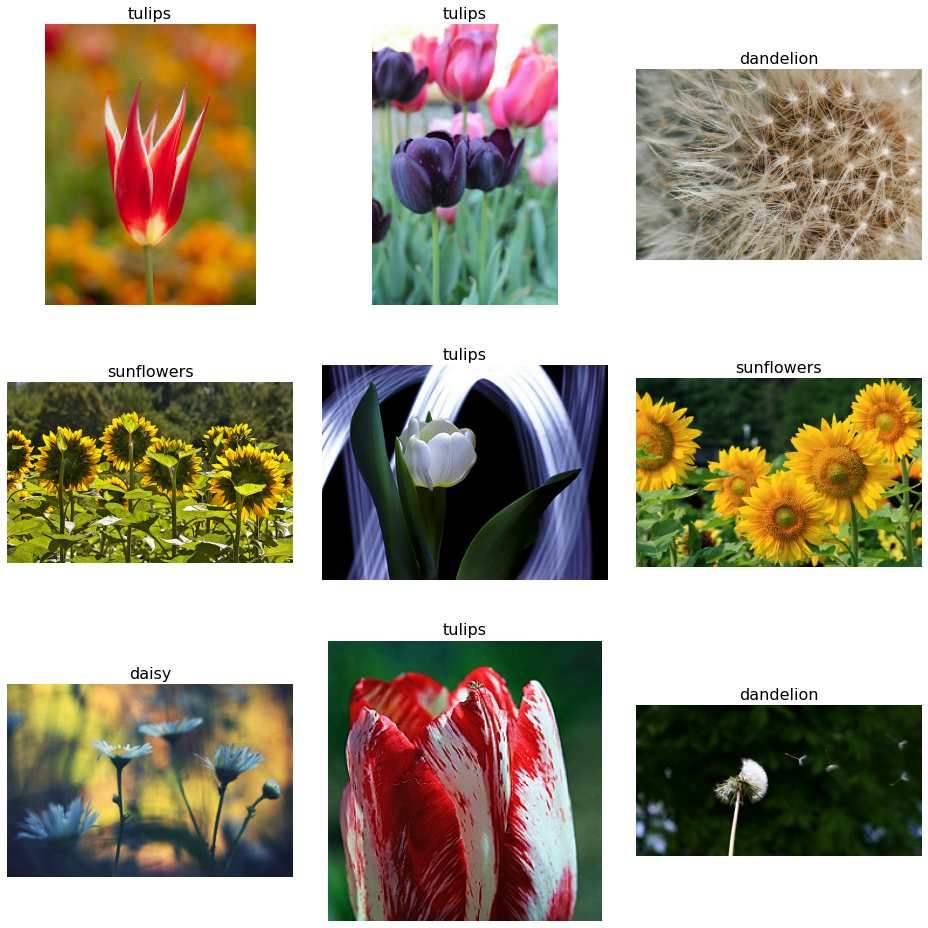

In [ ]:
  ### QUESTION 5.
display_9_images_from_dataset(dataset)